Mobile Data Usage and User Behvaiour

For the project i will be using the CRSP-DM Process to be able to analyse this Data set. This data set is looking at mobile data usage and and user behavior. Below is the CRSP-DM Process:

1 BUSINESS UNDERSTANDING (understanding the problem and questions to be tackled)

2 DATA UNDERSTANDING (moving the questions to data)

3 DATA PREPARATION (Wrangling and cleaning the data)

4 DATA MODELING


Business Understanding 

I want to undestand the following; 

Does you Age impact your screen time?

Is there a relationship between your gender or the device you use and screen time?

What can help indicate screen time?

Data Understanding 

I will be analysising the data, to understand the size, what the data is showing, any weeknesses in the data etc. 

In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

df = pd.read_csv('./user_behavior_dataset.csv')
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [299]:
#This is code i learnt from the Data science nano degree
#I am using this to understand the size of the data
df.shape

(700, 11)

In [300]:
#I can see the size of the data, 700 rows and 11 columns. 
# This is a reasonable size dataset to make an analysis (although it is not a large dataset)

In [301]:
#using this code is able to explain to give real insight on the whole data set
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [302]:
#Max screen time (hours/day) is 12. The age ranges from 18 to 59.
#Knowing the age ranges will be useful for me when creating age groups.

In [303]:
#This was used in the data nano degree course as a way to understand the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [304]:
#Having a look at the data, i can see the the types look reasonable, which means for now there is no need to make any changes to the type.

Analysing Age 

C:\Users\cmezu\AppData\Local\Temp\ipykernel_5096\3184701733.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  screen_time_by_age_group = df.groupby("Age Group")["Screen On Time (hours/day)"].mean()


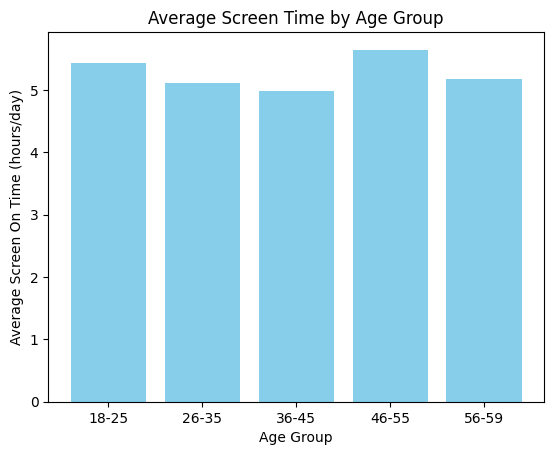

In [305]:
#I want to see the average screen time for age group
age_bins = [18, 25, 35, 45, 55, 60] #The youngest age is 18 and the oldest age is 59
age_labels = ["18-25", "26-35", "36-45", "46-55", "56-59"]  # Define labels for the bins

df["Age Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels)

screen_time_by_age_group = df.groupby("Age Group")["Screen On Time (hours/day)"].mean()

# Plotting the bar chart 
plt.bar(screen_time_by_age_group.index, screen_time_by_age_group, color="skyblue")
plt.title("Average Screen Time by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Screen On Time (hours/day)")

plt.show()


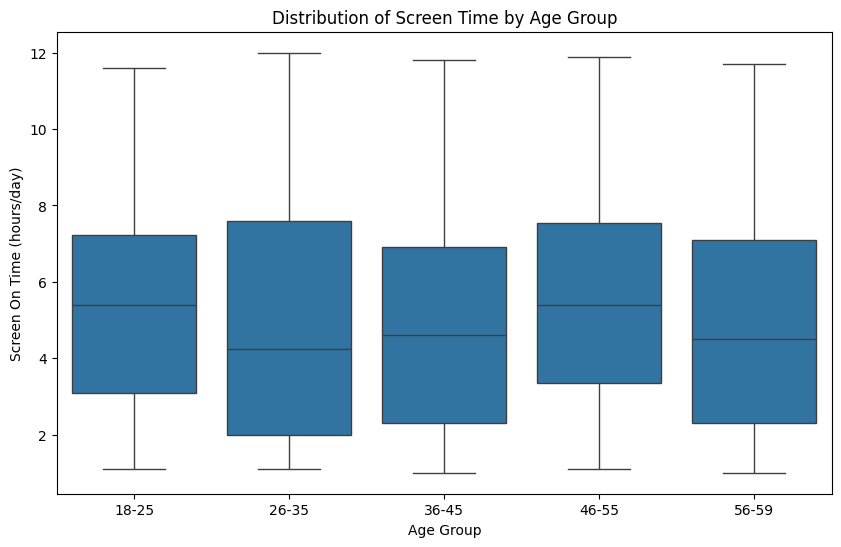

In [306]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Age Group", y="Screen On Time (hours/day)") #using seaborn for boxplot as this gave more accuracy in the visual compared to pandas
plt.title("Distribution of Screen Time by Age Group")
plt.show()

In [307]:
age_group_counts = df['Age Group'].value_counts().sort_index()
print(age_group_counts) #to see the count for each age group

Age Group
18-25    120
26-35    176
36-45    165
46-55    167
56-59     61
Name: count, dtype: int64


Operating system analysis

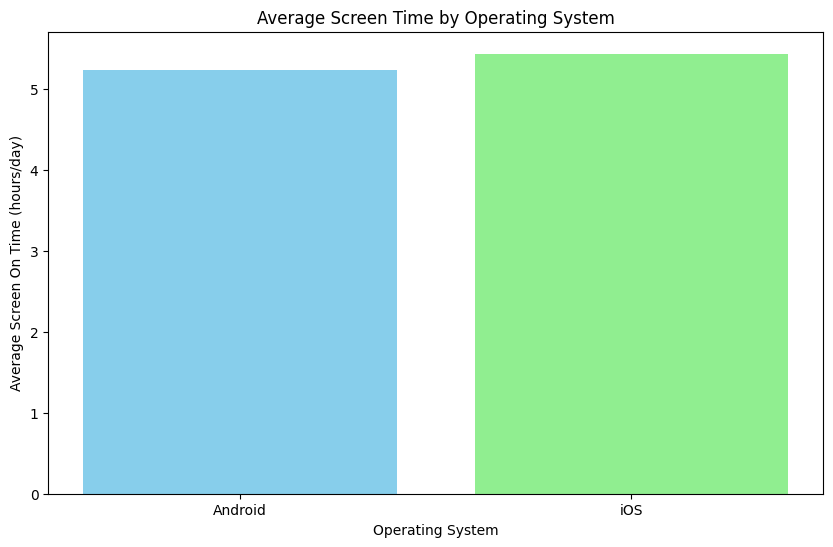

In [308]:
# Group by operating system and calculate the average screen time
screen_time_by_os = df.groupby("Operating System")["Screen On Time (hours/day)"].mean()

plt.figure(figsize=(10, 6)) #keeping it consistant at 10,6
plt.bar(screen_time_by_os.index, screen_time_by_os, color=["skyblue", "lightgreen"])
plt.title("Average Screen Time by Operating System")
plt.xlabel("Operating System")
plt.ylabel("Average Screen On Time (hours/day)")


plt.show()

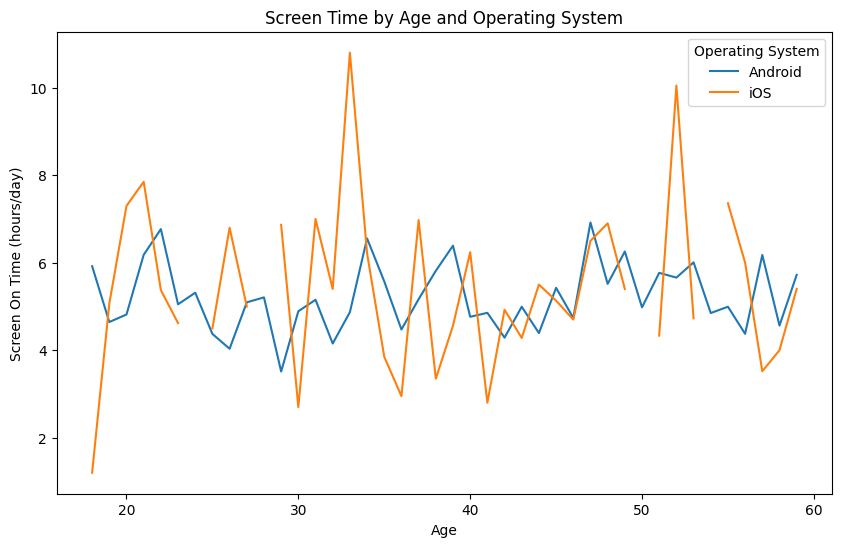

In [309]:
# Group by Operating System and Age, calculate the average screen time
grouped_data = df.groupby(["Operating System", "Age"])["Screen On Time (hours/day)"].mean().unstack(level=0)

# Plot the line graph
grouped_data.plot(kind='line', figsize=(10, 6))

# Add title and labels
plt.title("Screen Time by Age and Operating System")
plt.xlabel("Age")
plt.ylabel("Screen On Time (hours/day)")
plt.legend(title="Operating System")  

plt.show()

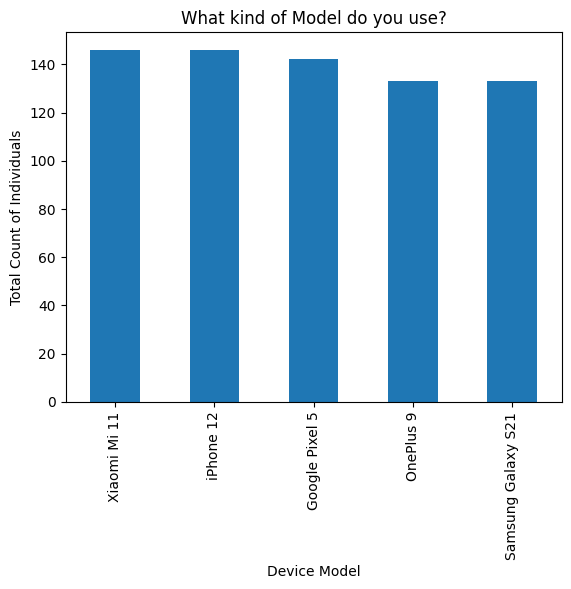

In [310]:
# count how many people are using each device model
device_count = df["Device Model"].value_counts() 

# bar graph to visual the count
device_count.plot(kind="bar")
plt.title("What kind of Model do you use?")
plt.xlabel("Device Model")
plt.ylabel("Total Count of Individuals")
plt.show()

Gender Analysis

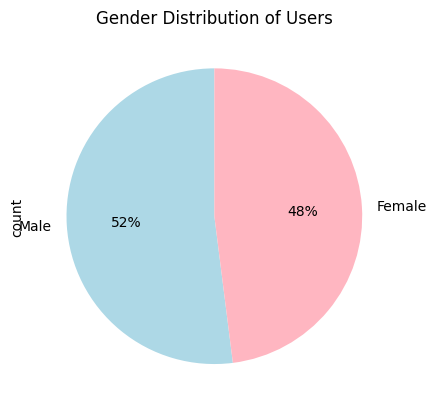

In [311]:
gender_counts = df["Gender"].value_counts()
gender_counts.plot(kind="pie", colors=["lightblue", "lightpink"], autopct='%1.0f%%', startangle=90)
plt.title("Gender Distribution of Users")
plt.show()

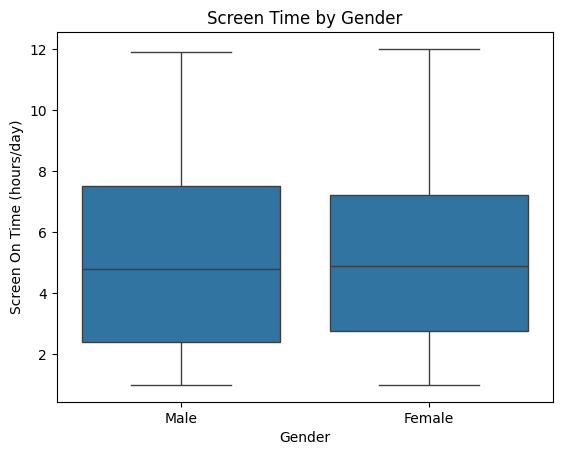

In [312]:
sns.boxplot(data=df, x="Gender", y="Screen On Time (hours/day)")
plt.title("Screen Time by Gender")
plt.show()

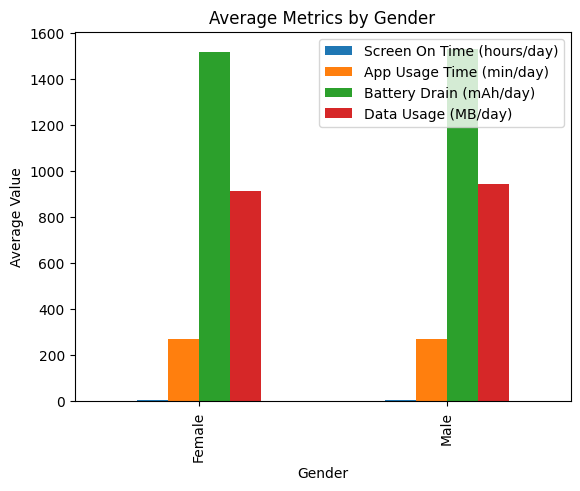

In [313]:
df.groupby("Gender")[["Screen On Time (hours/day)", "App Usage Time (min/day)", "Battery Drain (mAh/day)", "Data Usage (MB/day)"]].mean().plot(kind="bar")
plt.title("Average Metrics by Gender")
plt.ylabel("Average Value")
plt.show()

Data Prccessing

In [314]:
df.isnull()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Age Group
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
695,False,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,False,False


In [315]:
df.isnull().sum() #there are no missing values in this data set

User ID                        0
Device Model                   0
Operating System               0
App Usage Time (min/day)       0
Screen On Time (hours/day)     0
Battery Drain (mAh/day)        0
Number of Apps Installed       0
Data Usage (MB/day)            0
Age                            0
Gender                         0
User Behavior Class            0
Age Group                     11
dtype: int64

Data Modelling

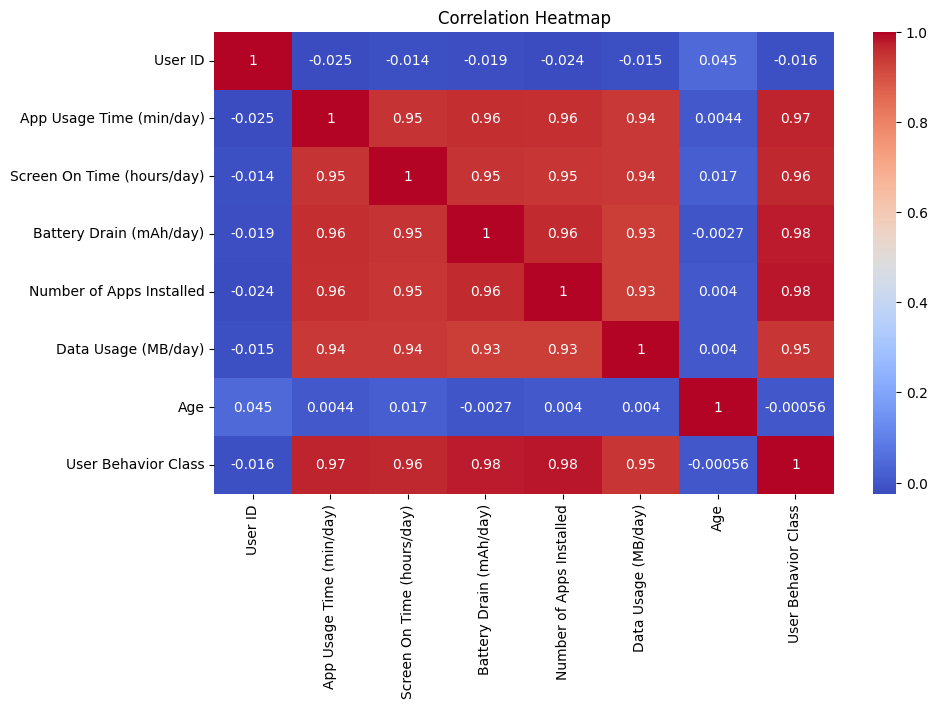

In [316]:
#creating a heatmap just to see for all numerical values first, to see if there is a relationship there 

numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",)
plt.title("Correlation Heatmap")
plt.show()

In [317]:
#App usage time, screen on time, battery drain, number of apps installed, data usage and user behaviour class,
#all seem to have a stong positive correlation -
#  as one increase the other tends to increase as well
#this doesn't seem suprising 
#there looks to be no relationship between user id and age when looking at user behaviour
#age is suprising due to wider reasearch was thinking there may be a relationship there 

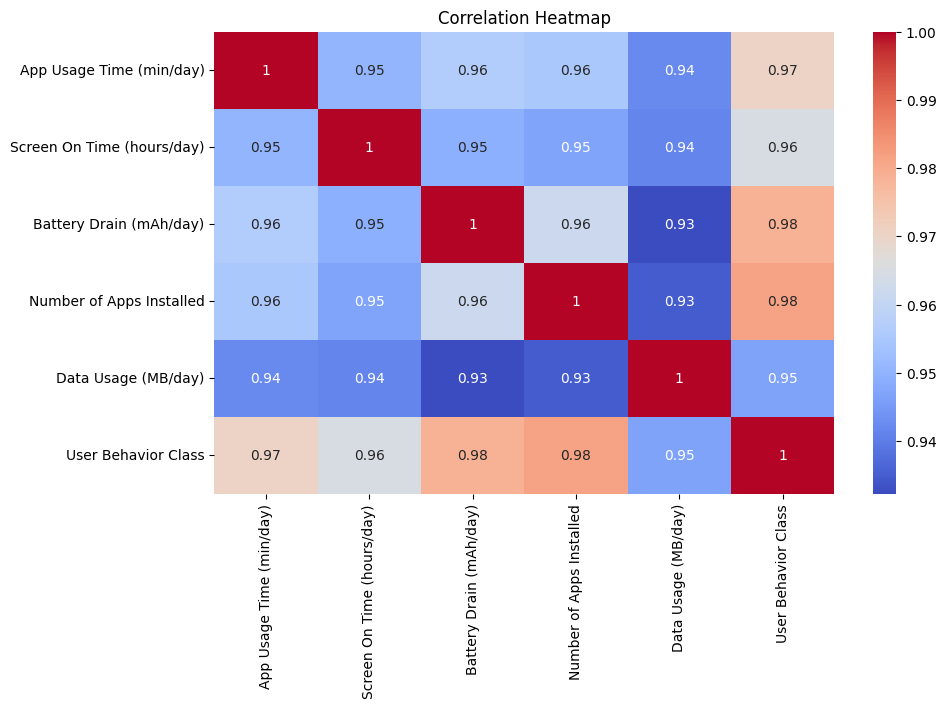

In [318]:
#same heatmap but without age and user id
numeric_df = df.select_dtypes(include=['number']).drop(columns=["Age", "User ID"])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",)
plt.title("Correlation Heatmap")
plt.show()

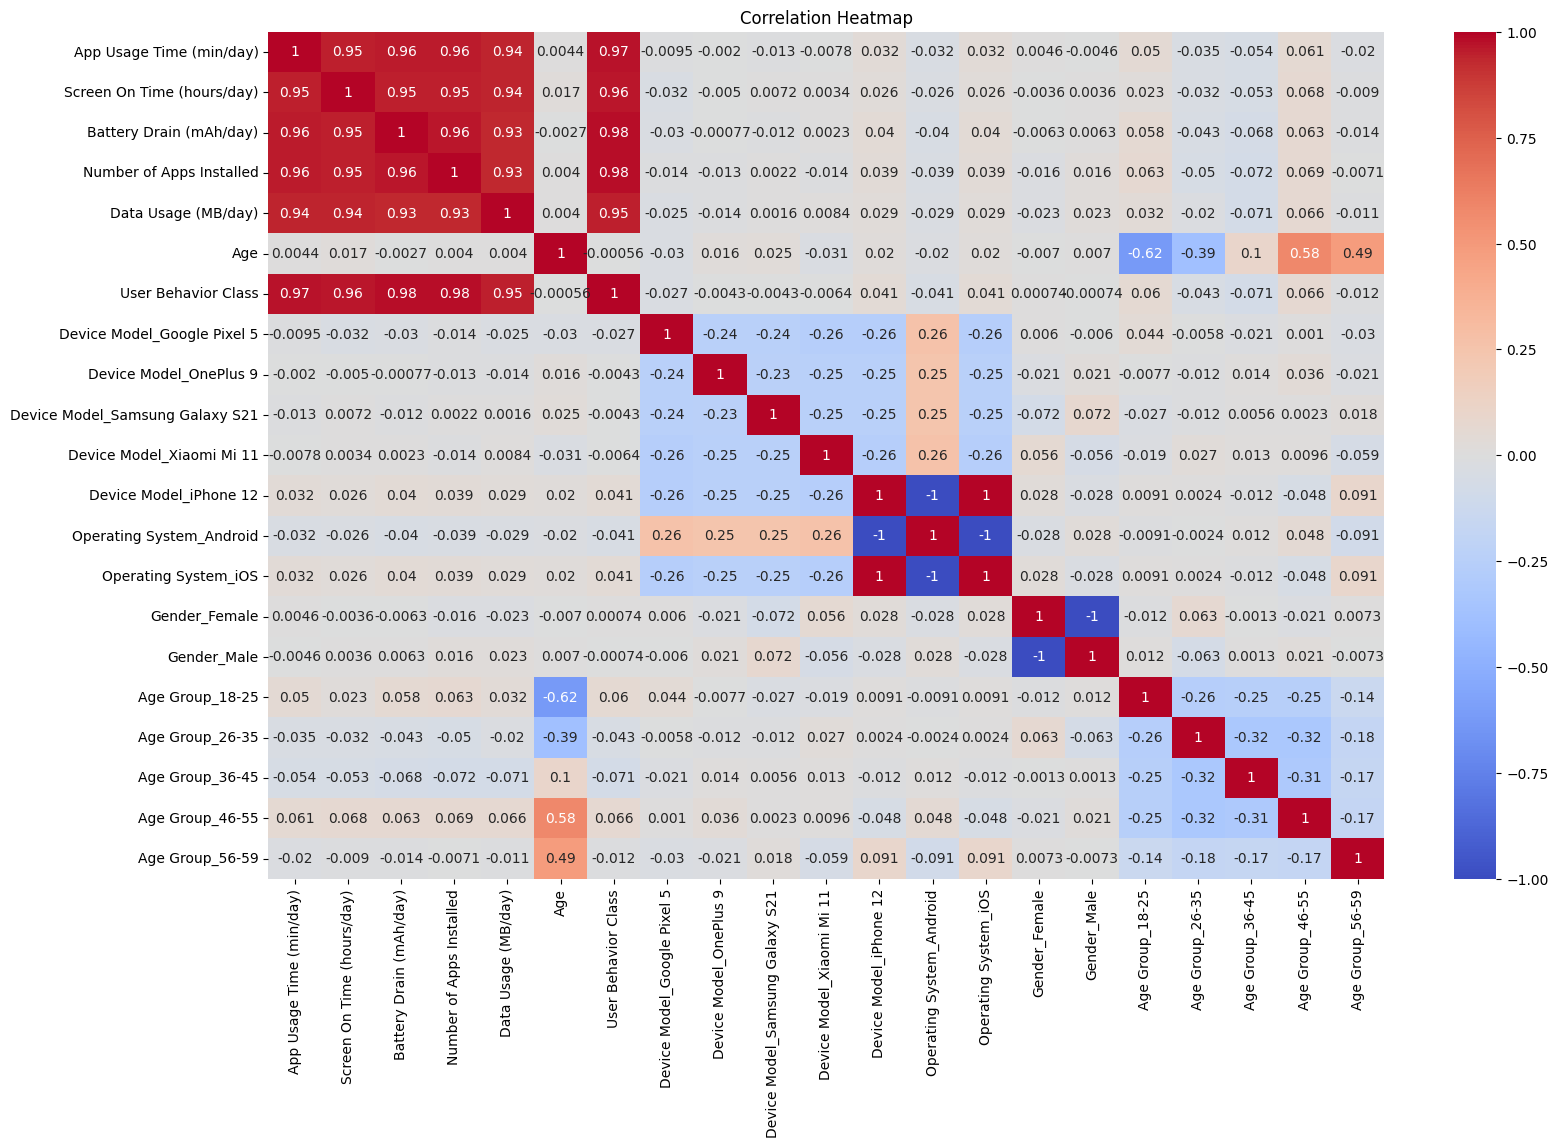

In [319]:
categorical_columns = pd.get_dummies(df.drop(columns=["User ID"]), drop_first=False)


# Calculate the correlation matrix
correlation_matrix = categorical_columns.corr()

plt.figure(figsize=(18, 11)) #needed more space to fit all values

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",)
plt.title("Correlation Heatmap")
plt.show()

In [320]:
#I wanted to be able to understand if there is a relationship between the categorical data and the numberical data
#I am not seeing any strong relationships

Data Modelling 2

In [321]:
#predict screen time

In [322]:
# Drop "User ID" and one-hot encode categorical variables
df = df.drop(columns=["User ID"])
df = pd.get_dummies(df, drop_first=True) #i put true here because i wanted to reduce the chance of multicollinearity, although i have used false in this workbook

# Define features and target variable
X = df.drop(columns=["Screen On Time (hours/day)"])
y = df["Screen On Time (hours/day)"]

# Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances}).sort_values(by="Importance", ascending=False)
print(importance_df)

                            Feature  Importance
1           Battery Drain (mAh/day)    0.271964
0          App Usage Time (min/day)    0.226968
2          Number of Apps Installed    0.172488
3               Data Usage (MB/day)    0.171000
5               User Behavior Class    0.144558
4                               Age    0.006814
11                      Gender_Male    0.001036
7   Device Model_Samsung Galaxy S21    0.000770
13                  Age Group_36-45    0.000689
8         Device Model_Xiaomi Mi 11    0.000676
6            Device Model_OnePlus 9    0.000668
9            Device Model_iPhone 12    0.000602
14                  Age Group_46-55    0.000575
12                  Age Group_26-35    0.000481
10             Operating System_iOS    0.000451
15                  Age Group_56-59    0.000258


In [323]:
# i want to see how effective the model is

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.5808436571428567
R-squared: 0.9352634813825305
